# Data Analysis Project: Bike Sharing Dataset
- **Name:** Abizard Hashfi Darmawan
- **Email:** abizard.03@gmail.com
- **ID Dicoding:** abizardhashfid

## Menentukan Pertanyaan Bisnis

- What is the trend of the average number of bicycle rentals per month each year?
- What is the distribution of the average number of bicycle rentals per season?
- What is the distribution of the average number of bicycle rentals based on weather (weathersit)?
- What is the average level of bicycle rentals based on hours in several seasons that occur?

## Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## Data Wrangling

### Gathering Data

In [2]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/abizard/bike-sharing-data-analysis/main/data/hour.csv')
day_df = pd.read_csv('https://raw.githubusercontent.com/abizard/bike-sharing-data-analysis/main/data/day.csv')

### Data Characteristic

- instant: record index
- dteday : date
- season : season (1:springer, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are divided to 41 (max)
- atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [3]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
print(hour_df.info())
print('SHAPE :', hour_df.shape)
print(day_df.info())
print('SHAPE :', day_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
SHAPE : (17379, 17)
<class 'pandas.core.fram

**Data Merging by dteday Column**

In [6]:
main_df = pd.merge(hour_df, day_df, on='dteday', how='left', suffixes=('_hour', '_day'))
main_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [7]:
main_df.shape

(17379, 32)

Merge hour.csv and day.csv data using the **Left Join** method to get all the data in hour.csv as well as some data that matches the day.csv data.



### Assessing Data

**Checking Missing Values**

In [8]:
print('Missing Value :')
print(main_df.isnull().sum())

Missing Value :
instant_hour       0
dteday             0
season_hour        0
yr_hour            0
mnth_hour          0
hr                 0
holiday_hour       0
weekday_hour       0
workingday_hour    0
weathersit_hour    0
temp_hour          0
atemp_hour         0
hum_hour           0
windspeed_hour     0
casual_hour        0
registered_hour    0
cnt_hour           0
instant_day        0
season_day         0
yr_day             0
mnth_day           0
holiday_day        0
weekday_day        0
workingday_day     0
weathersit_day     0
temp_day           0
atemp_day          0
hum_day            0
windspeed_day      0
casual_day         0
registered_day     0
cnt_day            0
dtype: int64


**Checking Duplicate Data**

In [9]:
print('Duplikasi Data :')
print(main_df.duplicated().sum())

Duplikasi Data :
0


There are no missing values ​​or duplicate data in main_df.

**Checking Data Distribution**

In [10]:
main_df.describe(include='all')

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,...,3.003683,0.682721,1.391680,0.496987,0.475775,0.627229,0.190098,854.339720,3679.353242,4533.692963
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,...,2.005771,0.465431,0.540501,0.182445,0.162426,0.141779,0.077204,685.686754,1544.953518,1917.376947
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.340000,0.338363,0.520000,0.134950,318.000000,2545.000000,3214.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,...,3.000000,1.000000,1.000000,0.502500,0.490122,0.625833,0.180967,724.000000,3681.000000,4563.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,...,5.000000,1.000000,2.000000,0.655833,0.610488,0.729583,0.233204,1100.000000,4801.000000,5986.000000


### Cleaning Data

**Transforming Data Type**

In [11]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   instant_hour     17379 non-null  int64  
 1   dteday           17379 non-null  object 
 2   season_hour      17379 non-null  int64  
 3   yr_hour          17379 non-null  int64  
 4   mnth_hour        17379 non-null  int64  
 5   hr               17379 non-null  int64  
 6   holiday_hour     17379 non-null  int64  
 7   weekday_hour     17379 non-null  int64  
 8   workingday_hour  17379 non-null  int64  
 9   weathersit_hour  17379 non-null  int64  
 10  temp_hour        17379 non-null  float64
 11  atemp_hour       17379 non-null  float64
 12  hum_hour         17379 non-null  float64
 13  windspeed_hour   17379 non-null  float64
 14  casual_hour      17379 non-null  int64  
 15  registered_hour  17379 non-null  int64  
 16  cnt_hour         17379 non-null  int64  
 17  instant_day 

In [12]:
main_df['dteday'] = pd.to_datetime(main_df['dteday'])
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  int64         
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  int64         
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  int64         
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  int64         
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

There is a data type mismatch in the **dteday** column, namely **object** and must be changed to **datetime**.

**Convert yr, mnth, and weekday Columns to Strings**

In [13]:
main_df['yr_hour'] = main_df['dteday'].dt.year
main_df['yr_day'] = main_df['dteday'].dt.year
main_df['mnth_hour'] = main_df['dteday'].dt.month_name()
main_df['mnth_day'] = main_df['dteday'].dt.month_name()
main_df['weekday_hour'] = main_df['dteday'].dt.day_name()
main_df['weekday_day'] = main_df['dteday'].dt.day_name()

In [14]:
main_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,1,2011,January,0,0,Saturday,0,1,...,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,1,2011,January,1,0,Saturday,0,1,...,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,1,2011,January,2,0,Saturday,0,1,...,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,1,2011,January,3,0,Saturday,0,1,...,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,1,2011,January,4,0,Saturday,0,1,...,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


**Mapping Season Columns Based on Key**

In [15]:
season = {
    1 : 'Spring',
    2 : 'Summer',
    3 : 'Fall',
    4 : 'Winter'
}

main_df['season_hour'] = main_df['season_hour'].map(season)
main_df['season_day'] = main_df['season_day'].map(season)
main_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,1,...,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,1,...,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,1,...,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,1,...,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,1,...,Saturday,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


**Mapping Weathersit Columns Based on Key**

In [16]:
weathersit = {
    1 : 'Sunny',
    2 : 'Cloudy Fog',
    3 : 'Light Rainfall',
    4 : 'Heavy Rainfall'
}

main_df['weathersit_hour'] = main_df['weathersit_hour'].map(weathersit)
main_df['weathersit_day'] = main_df['weathersit_day'].map(weathersit)
main_df.head()

,instant_hour,dteday,season_hour,yr_hour,mnth_hour,hr,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,hum_day,windspeed_day,casual_day,registered_day,cnt_day
0,1,2011-01-01,Spring,2011,January,0,0,Saturday,0,Sunny,...,Saturday,0,Cloudy Fog,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-01,Spring,2011,January,1,0,Saturday,0,Sunny,...,Saturday,0,Cloudy Fog,0.344167,0.363625,0.805833,0.160446,331,654,985
2,3,2011-01-01,Spring,2011,January,2,0,Saturday,0,Sunny,...,Saturday,0,Cloudy Fog,0.344167,0.363625,0.805833,0.160446,331,654,985
3,4,2011-01-01,Spring,2011,January,3,0,Saturday,0,Sunny,...,Saturday,0,Cloudy Fog,0.344167,0.363625,0.805833,0.160446,331,654,985
4,5,2011-01-01,Spring,2011,January,4,0,Saturday,0,Sunny,...,Saturday,0,Cloudy Fog,0.344167,0.363625,0.805833,0.160446,331,654,985


In [17]:
main_df.to_csv('bike_df.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore Dataset

In [18]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   instant_hour     17379 non-null  int64         
 1   dteday           17379 non-null  datetime64[ns]
 2   season_hour      17379 non-null  object        
 3   yr_hour          17379 non-null  int64         
 4   mnth_hour        17379 non-null  object        
 5   hr               17379 non-null  int64         
 6   holiday_hour     17379 non-null  int64         
 7   weekday_hour     17379 non-null  object        
 8   workingday_hour  17379 non-null  int64         
 9   weathersit_hour  17379 non-null  object        
 10  temp_hour        17379 non-null  float64       
 11  atemp_hour       17379 non-null  float64       
 12  hum_hour         17379 non-null  float64       
 13  windspeed_hour   17379 non-null  float64       
 14  casual_hour      17379 non-null  int64

**Distribution of Temperature, Humidity, and Wind Speed ​​Data**

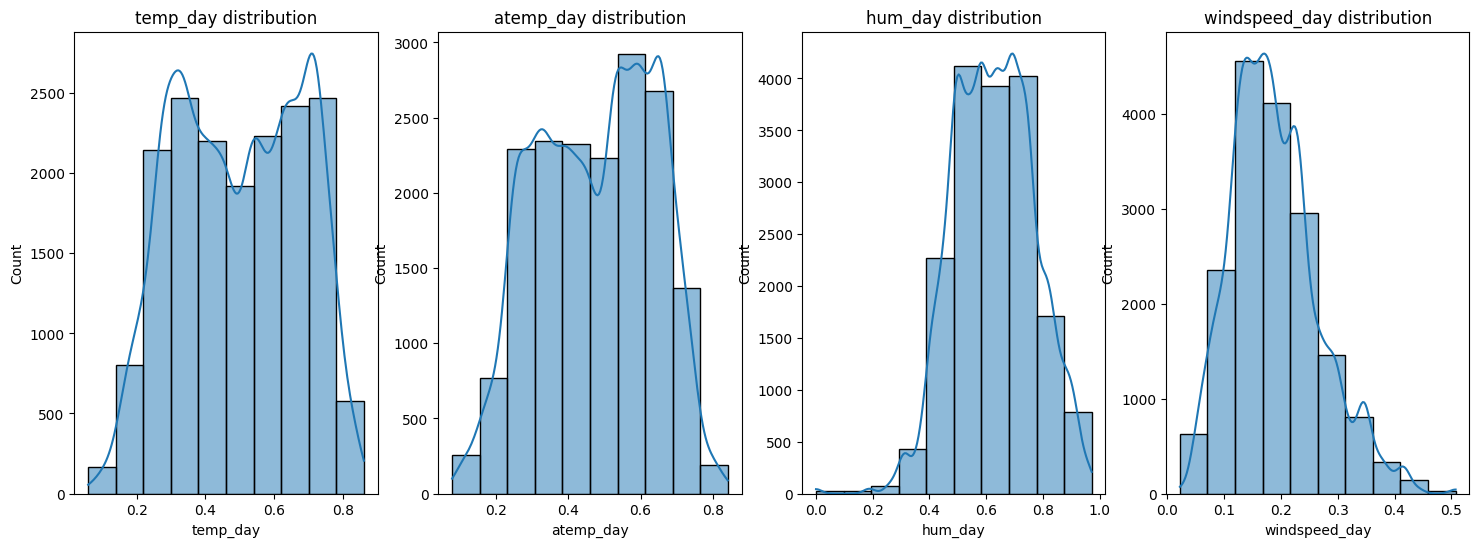

In [19]:
fig, axis = plt.subplots(nrows=1, ncols=4, figsize=(18,6))
columns = ['temp_day', 'atemp_day', 'hum_day','windspeed_day']

for i, ax in enumerate(axis):
  sns.histplot(x=main_df[columns[i]], ax=ax, bins=10, kde=True)
  ax.set_title(f"{columns[i]} distribution")

plt.show()

It is known that the variables **temp_day**, **atemp_day**, and **hum_day** experience **Normal Distribution**. Meanwhile, the variable **windspeed_day** experiences **Right-Skewed Distribution**. This indicates that these four variables can be used further in the analysis process because they have been normalized.

**Correlation of Rental Amount with Temperature, Humidity, and Wind Speed ​​Levels**

In [20]:
correlation = main_df.iloc[:,[31, 25, 26, 27, 28]].corr()
correlation

,cnt_day,temp_day,atemp_day,hum_day,windspeed_day
cnt_day,1.000000,0.625232,0.629054,-0.091657,-0.231340
temp_day,0.625232,1.000000,0.991608,0.131257,-0.161577
atemp_day,0.629054,0.991608,1.000000,0.144272,-0.187460
hum_day,-0.091657,0.131257,0.144272,1.000000,-0.258150
windspeed_day,-0.231340,-0.161577,-0.187460,-0.258150,1.000000


<Axes: >

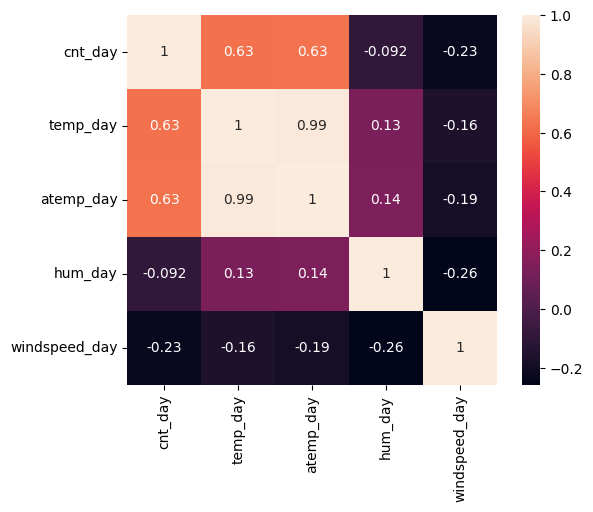

In [21]:
sns.heatmap(correlation, square=True, annot=True)

From the correlation table, it is known that the correlation between the variable **cnt_day (total rental)** with the variables **temp_day** and **atemp_day** has a strong (positive) relationship. Conversely, the variables **hum_day (humidity)** and **windspeed_day (wind speed)** have a low (negative) relationship with the variable **cnt_day**. Here are the assumptions:

* Customers tend to want to rent a bike when the weather is sunny and the temperature is high.
* Customers tend not to want to rent a bike when the air is very humid and the wind speed is high.

In [22]:
main_df.groupby(['yr_day', 'mnth_day', 'season_day']).agg({
    'casual_day' : 'sum',
    'registered_day' : 'sum',
    'cnt_day' : 'mean'
}).sort_values(by='cnt_day',ascending=False).reset_index()

,yr_day,mnth_day,season_day,casual_day,registered_day,cnt_day
0,2012,September,Winter,275688,1185096,7608.250000
1,2012,September,Fall,774984,3009984,7168.500000
2,2012,August,Fall,1036728,4111344,6919.451613
3,2012,June,Summer,716304,2575728,6858.400000
4,2012,October,Winter,827735,3929695,6719.533898
5,2012,July,Fall,1000920,3885648,6567.967742
6,2012,June,Fall,322752,1253136,6566.200000
7,2012,May,Summer,1061640,3639120,6318.225806
8,2012,March,Summer,322104,1214280,5819.636364
9,2012,April,Summer,921254,3249324,5808.604457


The highest rental amount was in **September 2012** when **Winter** occurred and this information fits with the previous correlation as winter tends to have low humidity levels.

## Visualization & Explanatory Analysis

### Question 1: What is the trend in the average number of bicycle rentals per month each year?

In [23]:
monthly_rent_df = main_df.resample(rule='M', on='dteday').agg({
    'cnt_day' : 'mean',
    'casual_day' : 'mean',
    'registered_day' : 'mean'
})

monthly_rent_df.index = monthly_rent_df.index.strftime('%Y-%m')
monthly_rent_df = monthly_rent_df.reset_index()
monthly_rent_df.rename(columns={
    'cnt_day':'total_rental',
    'casual_day' : 'casual_renter',
    'registered_day' : 'registered_renter'
}, inplace=True)
monthly_rent_df.sort_values('total_rental', ascending=False)

,dteday,total_rental,casual_renter,registered_renter
20,2012-09,7285.766667,1459.266667,5826.500000
19,2012-08,6919.451613,1393.451613,5526.000000
17,2012-06,6761.000000,1443.133333,5317.866667
21,2012-10,6719.533898,1169.117232,5550.416667
18,2012-07,6567.967742,1345.322581,5222.645161
16,2012-05,6318.225806,1426.935484,4891.290323
15,2012-04,5808.604457,1283.083565,4525.520891
14,2012-03,5319.096904,1019.076716,4300.020188
22,2012-11,5088.158774,701.438719,4386.720056
5,2011-06,4783.733333,1020.400000,3763.333333


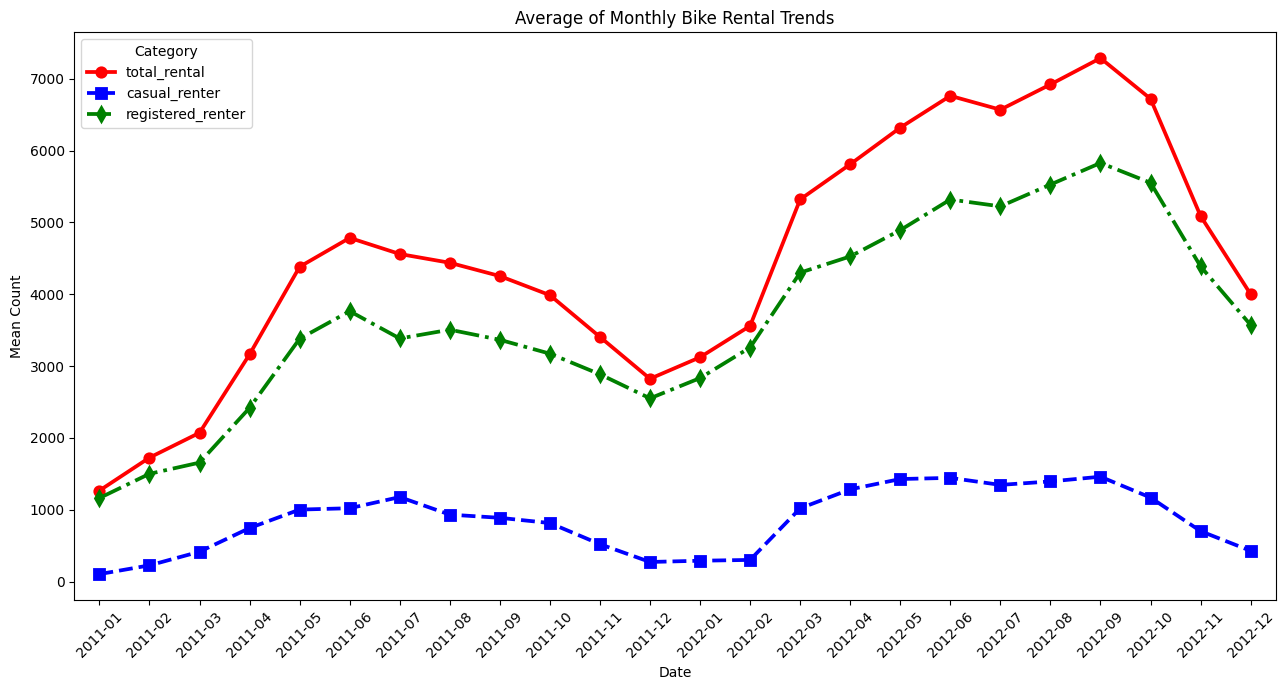

In [24]:
melted_monthly_rent_df = monthly_rent_df.melt(id_vars='dteday', var_name='variable', value_name='value')

plt.figure(figsize=(13,7))
sns.pointplot(
    data=melted_monthly_rent_df,
    x='dteday',
    y='value',
    hue='variable',
    palette=['red', 'blue', 'green'],
    markers=['o', 's', 'd'],
    linestyles=['-', '--', '-.']
)
plt.title('Average of Monthly Bike Rental Trends')
plt.xlabel("Date")
plt.ylabel("Mean Count")
plt.xticks(rotation=45)
plt.legend(title='Category', loc='upper left')
plt.tight_layout()
plt.show()

Based on the graph of the average trend of the number of bicycle rentals per month above, it is known that the month of **September 2012** had the highest average number of bicycle rentals.

### Question 2: What is the average distribution of the number of bicycle rentals per season?

In [25]:
seasonal_rent_df = main_df[['season_day', 'cnt_day']]
seasonal_rent_df.groupby('season_day')['cnt_day'].mean().sort_values(ascending=False)

season_day
Fall      5654.093194
Summer    4995.253119
Winter    4765.366021
Spring    2635.348185
Name: cnt_day, dtype: float64

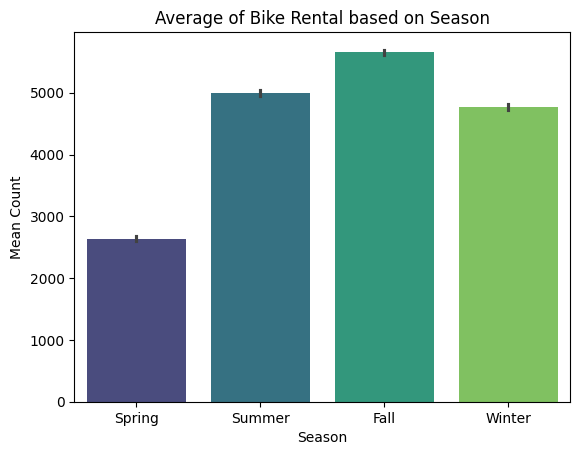

In [26]:
sns.barplot(
    data=seasonal_rent_df,
    x='season_day',
    y='cnt_day',
    hue='season_day',
    palette='viridis'
)
plt.title('Average of Bike Rental based on Season')
plt.xlabel("Season")
plt.ylabel("Mean Count")
plt.show()

Based on the visualization above, it is known that the average number of bicycle rentals occurs in **fall**.

### Question 3: What is the average distribution of bike rentals based on weather (weathersit)?

In [27]:
weather_based_rent_df = main_df[['weathersit_day', 'cnt_day']]
weather_based_rent_df.groupby('weathersit_day')['cnt_day'].mean().sort_values(ascending=False)

weathersit_day
Sunny             4895.177083
Cloudy Fog        4062.717595
Light Rainfall    1914.700855
Name: cnt_day, dtype: float64

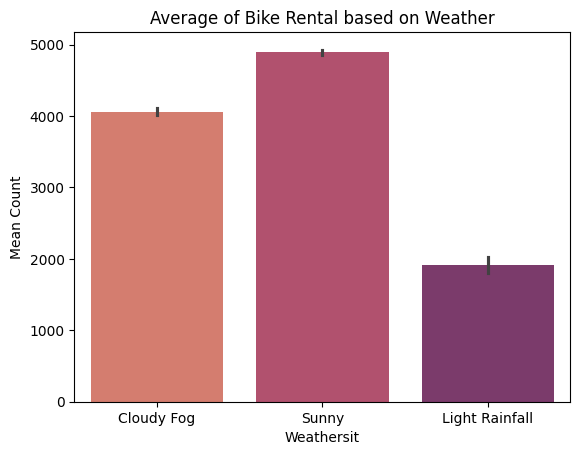

In [28]:
sns.barplot(
    data=weather_based_rent_df,
    x='weathersit_day',
    y='cnt_day',
    hue='weathersit_day',
    palette='flare'
)
plt.title('Average of Bike Rental based on Weather')
plt.xlabel("Weathersit")
plt.ylabel("Mean Count")
plt.show()

Based on the visualization above, it is known that the average number of bicycle rentals occurs when the weather is **sunny**.

### Question 4: What is the average rate of bicycle rentals by hour across the various seasons?

In [29]:
season_hour_df = main_df[['season_hour', 'hr', 'cnt_hour']]
season_hour_df.groupby(['season_hour','hr']).cnt_hour.mean().reset_index()

,season_hour,hr,cnt_hour
0,Fall,0,73.914439
1,Fall,1,43.720430
2,Fall,2,30.731183
3,Fall,3,15.752688
4,Fall,4,8.240642
...,...,...,...
91,Winter,19,297.033898
92,Winter,20,212.141243
93,Winter,21,161.327684
94,Winter,22,123.564972


In [30]:
season_hour_df.groupby(['season_hour','hr']).cnt_hour.mean().sort_values(ascending=False)

season_hour  hr
Fall         17    572.138298
             18    547.219251
Summer       17    518.847826
Winter       17    486.158192
Summer       18    483.173913
                      ...    
Fall         4       8.240642
Winter       4       7.267045
Spring       3       7.102564
Summer       4       6.211111
Spring       4       3.181818
Name: cnt_hour, Length: 96, dtype: float64

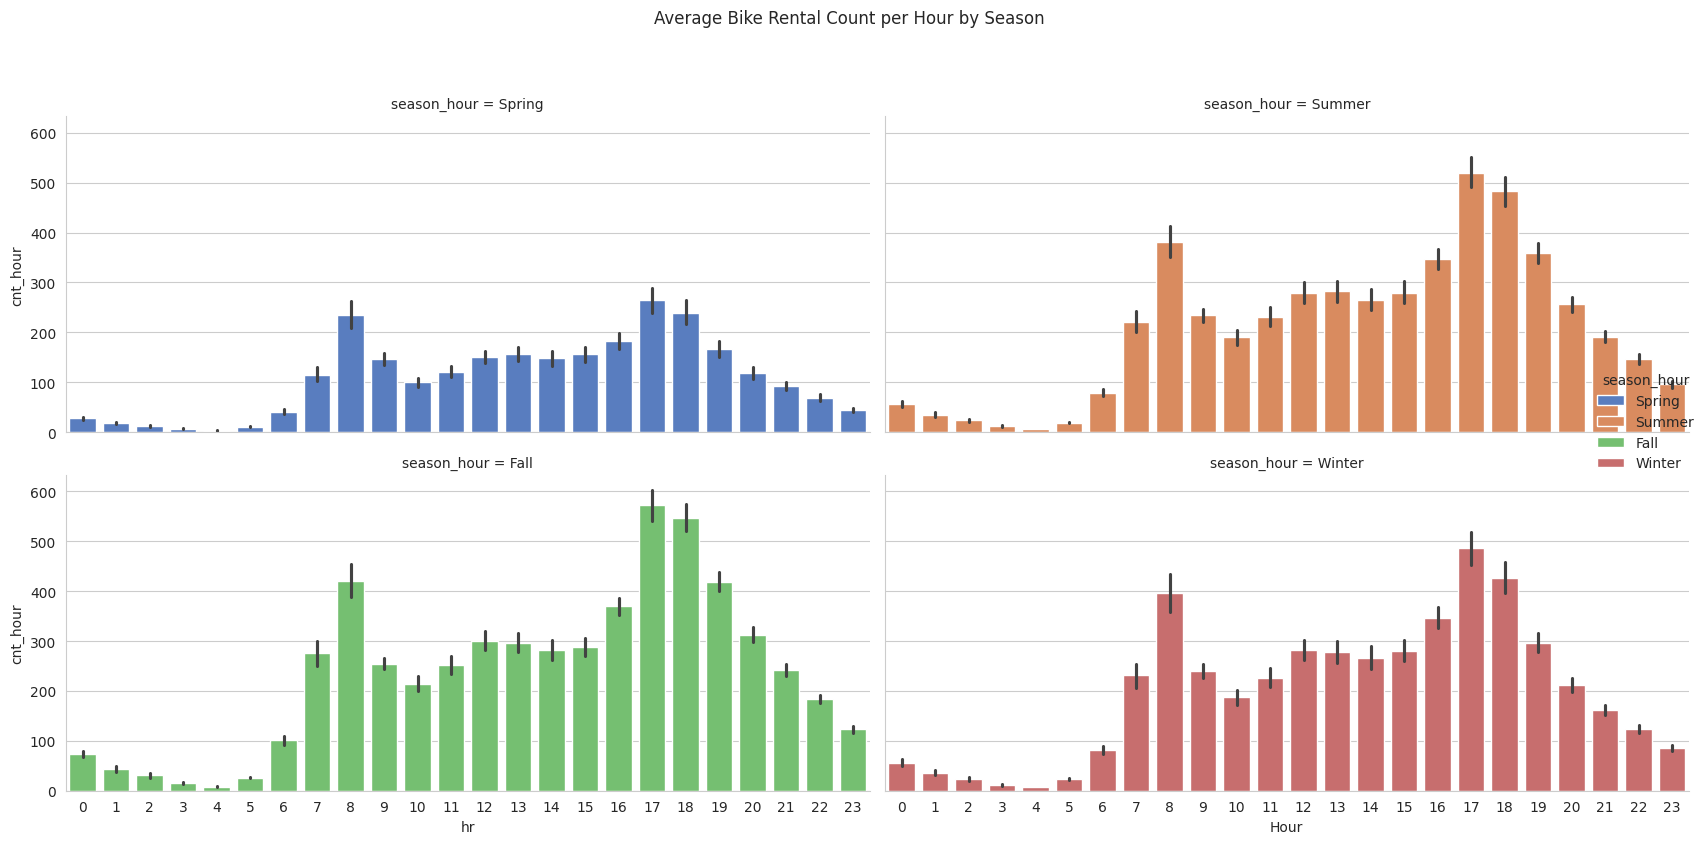

In [31]:
sns.set_style("whitegrid")
sns.catplot(
    data=season_hour_df,
    x='hr',
    y='cnt_hour',
    hue='season_hour',
    kind='bar',
    height=4,
    aspect=2,
    col='season_hour',
    col_wrap=2,
    palette='muted'
)
plt.suptitle('Average Bike Rental Count per Hour by Season', y=1.05)
plt.xlabel('Hour')
plt.ylabel('Average Bike Rental Count')
plt.tight_layout()
plt.show()

Based on the visualization above, it is known that the highest average bicycle rental rate occurs in **Fall**, especially around **17.00 - 18.00**.

## Conclusion

**Conclusion of question 1**
- The highest peak of the average monthly bicycle rental rate trend occurred in September 2012.
- This phenomenon is in accordance with the tendency of renters to consider the season that occurs in a certain period of time. If we look, September 2012 experienced winter and autumn. In both seasons, the weather tends to be stable, making bicycle users or renters more comfortable to cycle.
- In addition, it can also be seen that the increase in bicycle rentals by Casual Renters and Registered Renters will have a direct impact on the total rentals in a particular month.<br>

**Conclusion of question 2**
- In accordance with the previous conclusion, autumn is the season with the highest average total bicycle rentals compared to other seasons.
- If we look at other seasons such as summer and winter, they tend to have a fairly high average bicycle rental rate because both seasons are quite comfortable for bicycle users. In addition, there are also holidays and seasonal events that take place in both seasons.
- Then, spring tends to have the lowest average bicycle rental rate. This is because in this season the weather tends to be unstable (more frequent rainfall and fluctuating temperatures).<br>

**Conclusion of question 3**
- Based on the existing visualization, it is known that the average bicycle rental rate tends to be higher when the weather is sunny. This is certainly because the level of comfort when cycling will be much higher when the weather is friendly. In addition, air and road conditions also tend to be better and accompanied by beautiful surrounding scenery. Of course it will be the opposite when the weather is cloudy and foggy or even rainy.<br>

**Conclusion of question 4**
- From the four seasons shown, it is known that at 08.00 there is a tendency for consistent bicycle rentals. This is because at that hour, many people do their daily routines such as going to work, going to school, exercising, etc.
- Then, at 17.00 to 18.00 the number of bicycle rentals also tends to be consistent. This is because at that time the traffic will be dense because it is time to go home from school or work, so one of the fastest and most efficient vehicles is a bicycle. - Correlated with the results of the analysis of question 2, bicycle rentals in autumn (Fall) still have the highest average level. Followed in sequence by other seasons, namely summer (Summer), winter (Winter), and finally spring (Spring).